1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [5]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/
import pandas as pd
import os
script_dir = directory_path = os.getcwd()

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [10]:
filepath = "data\data_000637.txt"
abs_file_path = os.path.join(script_dir, filepath)
N = 0
while(N < 10000):
    try:
        N = int(input("Insert an integer larger than 10k:\n"))
    except Exception:
        print("Input not valid") 
df = pd.read_csv(abs_file_path, nrows=N)

Insert an integer larger than 10k:
1310722


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [4]:
bxcntmax = df['BX_COUNTER'].max()
print(bxcntmax)

3563


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [5]:
timeMeasurements = df['BX_COUNTER'] + bxcntmax * df['ORBIT_CNT'] + df['TDC_MEAS']
df['TIME_MEAS'] = timeMeasurements
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME_MEAS
0,1,0,123,3869200167,2374,26,13785960197421
1,1,0,124,3869200167,2374,27,13785960197422
2,1,0,63,3869200167,2553,28,13785960197602
3,1,0,64,3869200167,2558,19,13785960197598
4,1,0,64,3869200167,2760,25,13785960197806
...,...,...,...,...,...,...,...
9995,1,0,61,3869200267,696,11,13785960552028
9996,1,0,60,3869200267,701,5,13785960552027
9997,1,0,59,3869200267,707,23,13785960552051
9998,1,0,63,3869200267,706,15,13785960552042


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [7]:
df = pd.read_csv(filename)
timeMeasurements = df['BX_COUNTER'] + bxcntmax * df['ORBIT_CNT'] + df['TDC_MEAS']
df['TIME_MEAS'] = timeMeasurements
timestamp = pd.to_timedelta(df['TIME_MEAS'].max() - df['TIME_MEAS'].min())
print(timestamp)

0 days 00:00:00.039205632


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [33]:
print("\nFirst three TDC channels with most counts\n:")
print(df.groupby('TDC_CHANNEL')['TDC_CHANNEL'].count().nlargest(3))


First three TDC channels with most counts
:
TDC_CHANNEL
139    108059
64      66020
63      64642
Name: TDC_CHANNEL, dtype: int64


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [34]:
print("Non empyy orbits:")

print(df.ORBIT_CNT.nunique())

Non empyy orbits:
11001


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [35]:
print("Non empty orbits in channel 139:")

print(df[df['TDC_CHANNEL'].isin([139])].ORBIT_CNT.nunique())

Non empty orbits in channel 139:
10976


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [5]:
df_fpga0 = df[df['FPGA'].isin([0])]
series0 = df_fpga0.groupby('TDC_CHANNEL')['TDC_CHANNEL'].count()

df_fpga1 = df[df['FPGA'].isin([1])]
series1 = df_fpga1.groupby('TDC_CHANNEL')['TDC_CHANNEL'].count()

9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

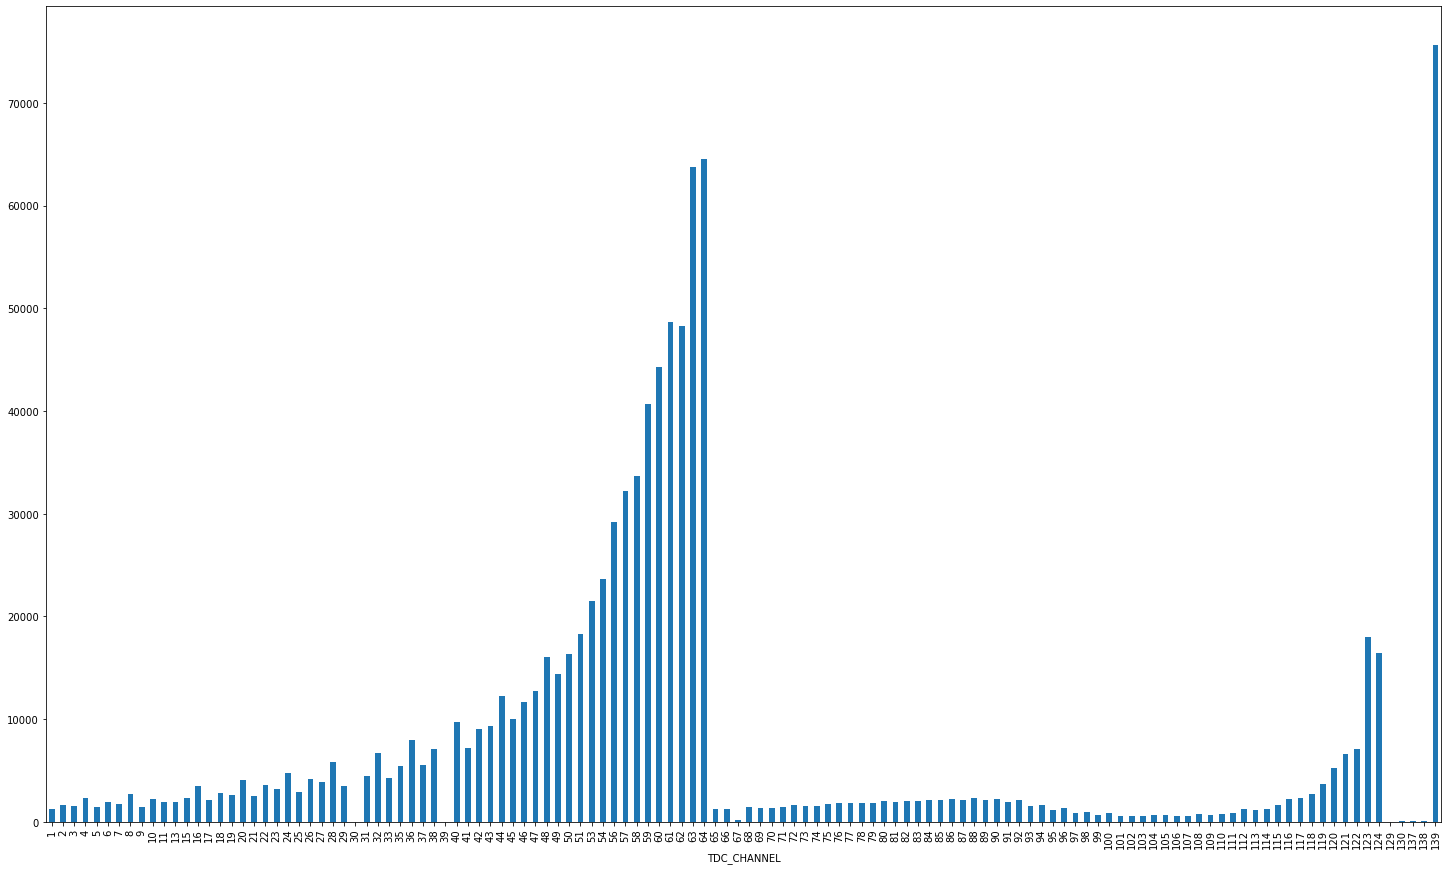

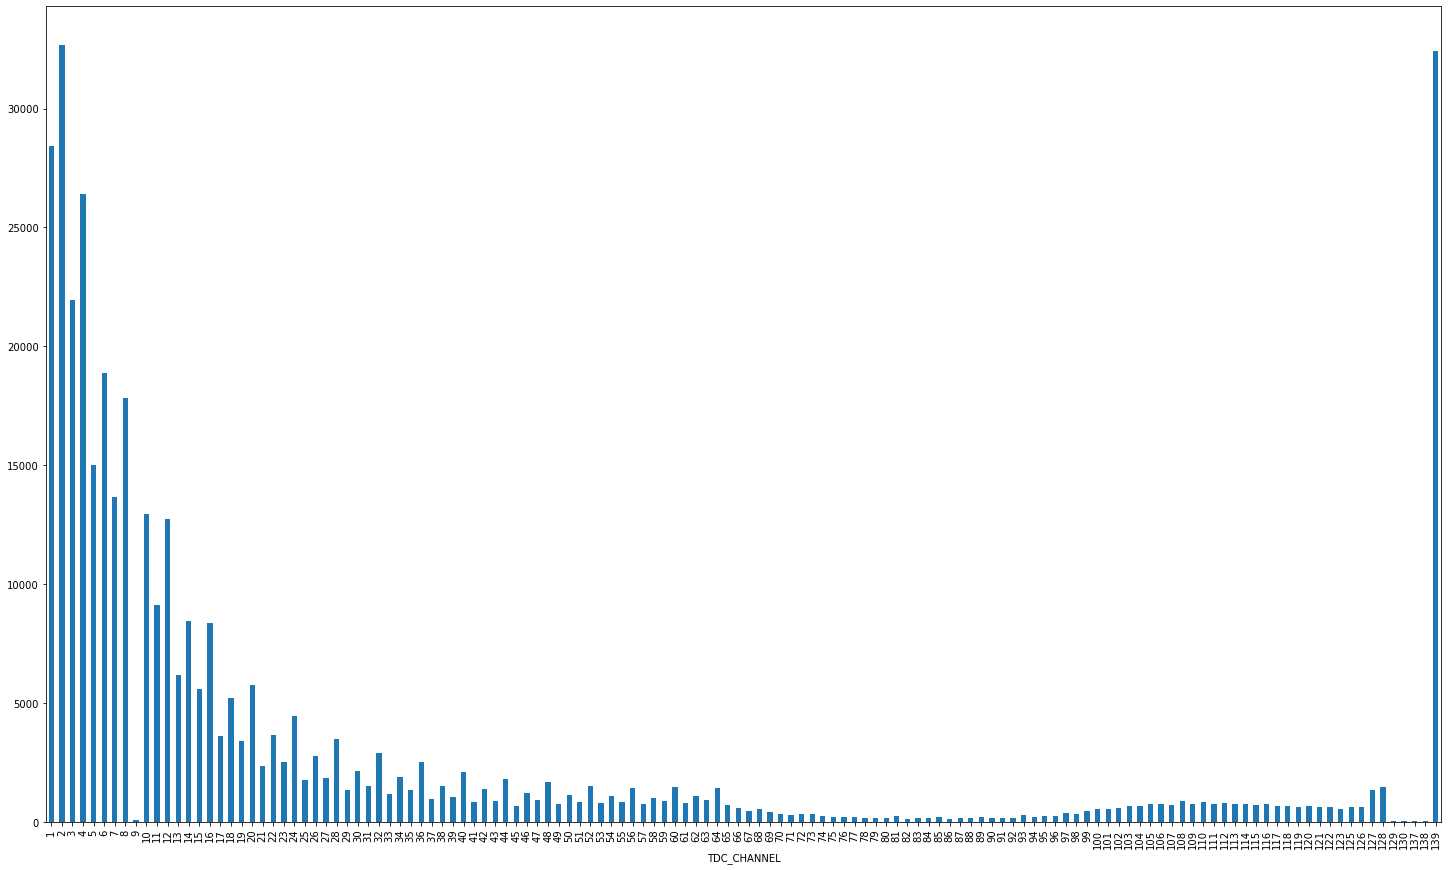

In [37]:
import matplotlib.pyplot as plt

series0.plot(kind='bar', figsize=(25,15))
plt.show()

series1.plot(kind='bar', figsize=(25,15))
plt.show()